# Importing required libraries

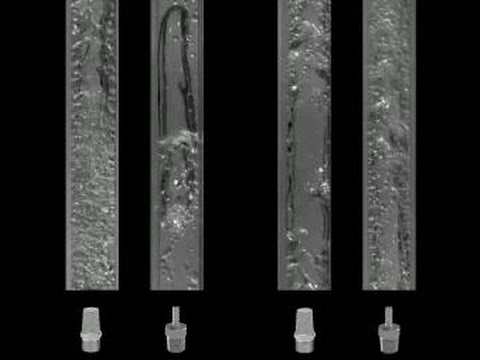

In [39]:
from IPython.display import YouTubeVideo

YouTubeVideo('pkhVxqDg_fk', width=840, height=465)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the data files

In [4]:
data = pd.read_csv('../Data/Petroleum2Phase/Petroleum2phasedata.csv',sep=';')

# Getting an overview of the data

In [5]:
data.head()

,Class_id,Class_name,Vsl,Vsg,ID,Roughness,Ang,Density_L,Density_G,Visc_L,Visc_G,ST,P,T
0,2,SS,0.029427,0.087232,0.0258,0,0.0,860.0,4.134,0.007,0.00001,0.032,350.0,22.0
1,5,I,0.057772,0.086743,0.0258,0,0.0,860.0,4.134,0.007,0.00001,0.032,350.0,22.0
2,5,I,0.119709,0.086256,0.0258,0,0.0,860.0,4.134,0.007,0.00001,0.032,350.0,22.0
3,5,I,0.210969,0.084695,0.0258,0,0.0,860.0,4.134,0.007,0.00001,0.032,350.0,22.0
4,5,I,0.361904,0.085076,0.0258,0,0.0,860.0,4.134,0.007,0.00001,0.032,350.0,22.0


In [13]:
#Go through all the features to get an idea of the scale of variability
data['Density_G'].unique()

array([ 4.134,  1.52 ,  1.61 ,  1.62 ,  1.63 ,  1.64 ,  1.8  ,  1.76 ,
        1.71 ,  1.69 ,  1.66 ,  1.85 ,  1.86 ,  1.89 ,  1.92 ,  2.01 ,
        2.06 ,  1.7  ,  1.72 ,  1.79 ,  1.88 ,  1.95 ,  2.04 ,  2.07 ,
        1.65 ,  1.67 ,  1.57 ,  1.55 ,  1.53 ,  1.6  ,  1.49 ,  1.5  ,
        1.51 ,  1.84 ,  1.83 ,  1.87 ,  1.91 ,  2.02 ,  1.74 ,  1.82 ,
        1.81 ,  1.97 ,  1.73 ,  1.77 ,  1.54 ,  1.93 ,  2.16 ,  1.68 ,
       26.06 , 25.6  , 24.62 , 24.45 , 24.58 , 25.23 , 24.69 , 24.21 ,
       24.05 , 24.06 , 25.14 , 25.27 , 24.52 , 24.14 , 23.9  , 24.1  ,
       24.66 , 24.88 , 24.16 , 23.6  , 23.5  , 23.75 , 24.75 , 24.5  ,
       23.48 , 23.2  , 23.46 , 24.03 , 24.49 , 24.28 , 23.64 , 23.29 ,
       23.71 , 23.94 , 23.69 , 23.57 , 23.28 , 22.91 , 22.61 , 22.92 ,
       23.59 , 23.53 , 23.15 , 22.73 , 22.87 , 23.67 , 23.4  , 23.1  ,
       22.74 , 22.89 , 23.78 , 23.61 , 23.05 , 22.78 , 23.09 , 23.96 ,
       23.55 , 23.22 , 22.75 , 24.67 , 24.56 , 24.15 , 23.91 , 24.51 ,
      

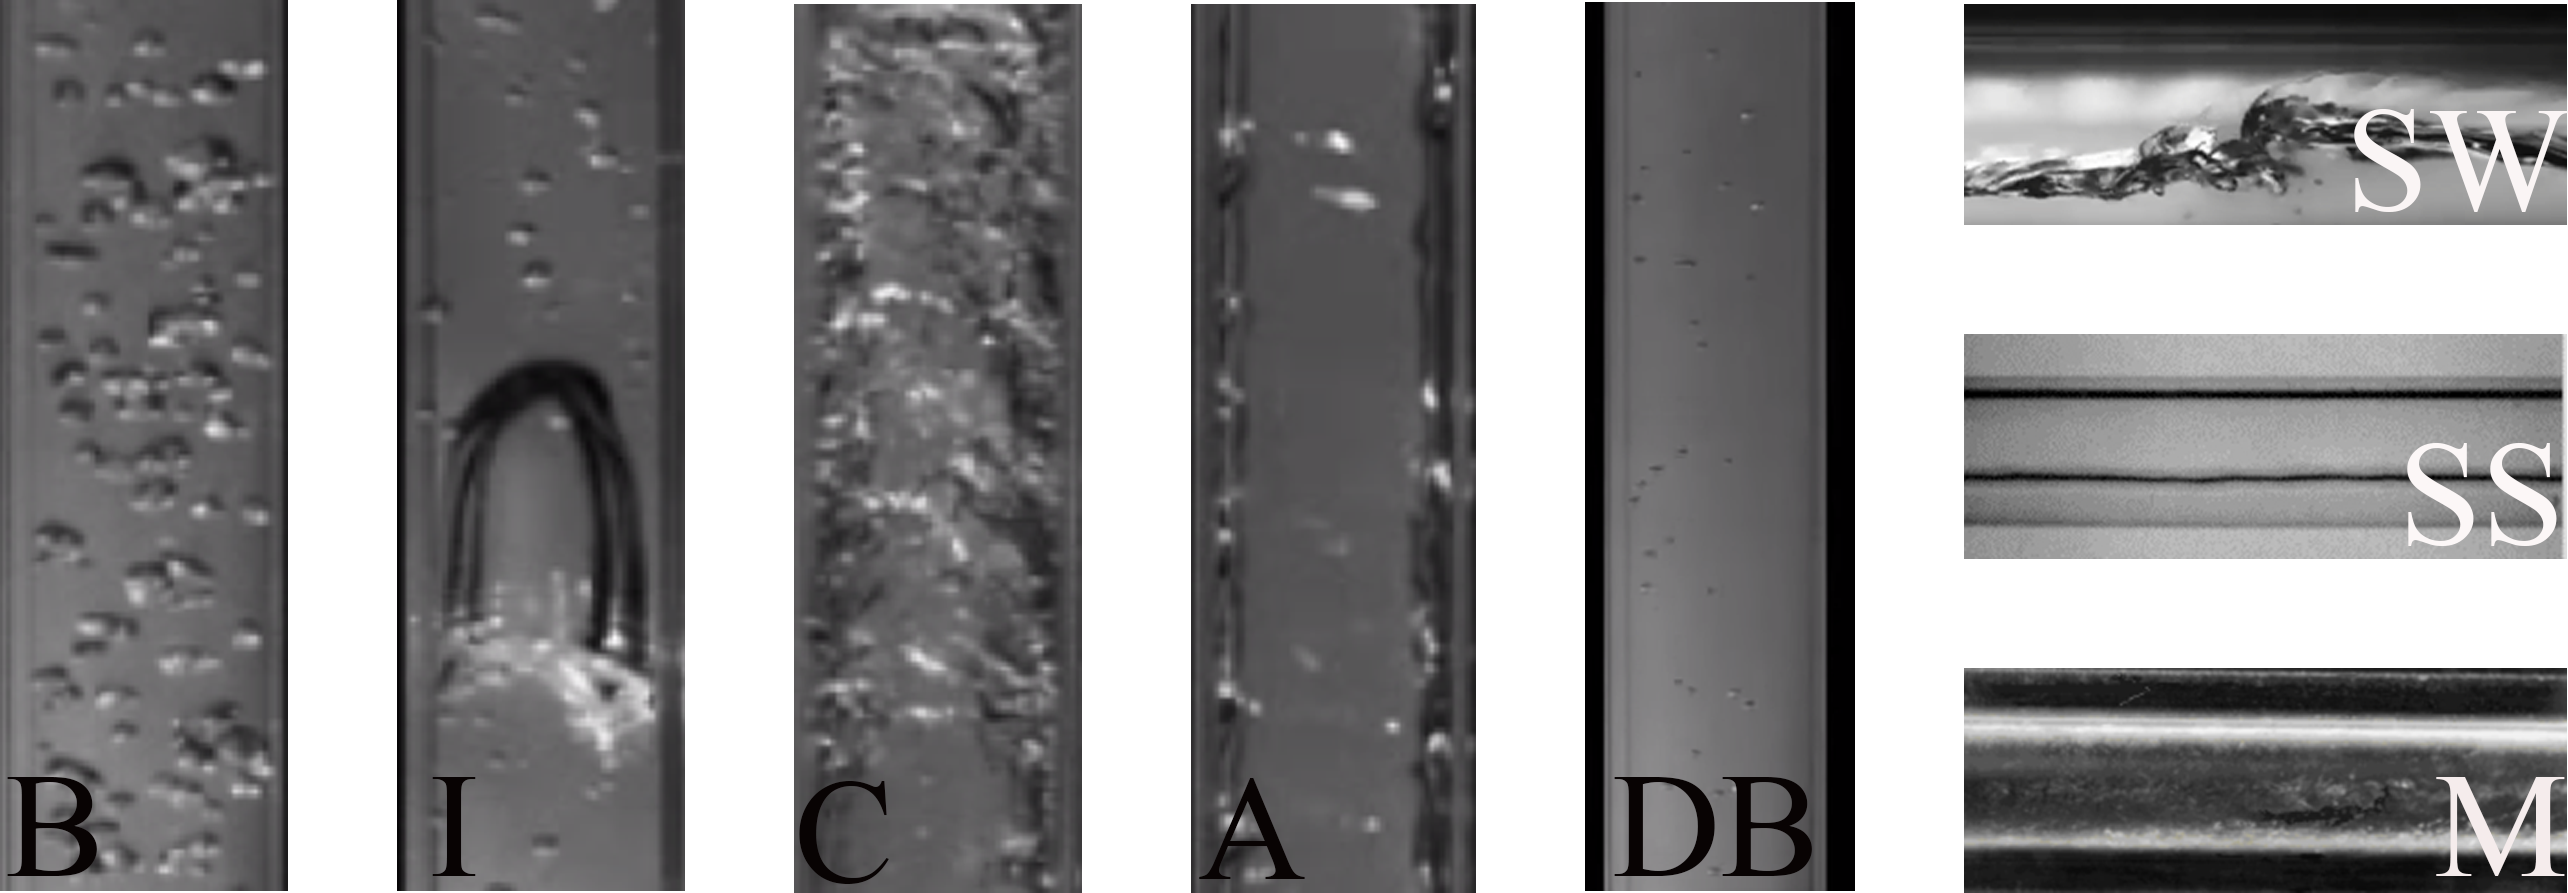

In [14]:
#Plot the distribution of data with respect to different features

#Evaluate whether the data is balanced across different classes

Text(0.5, 0, 'Angle ($\\theta$)')

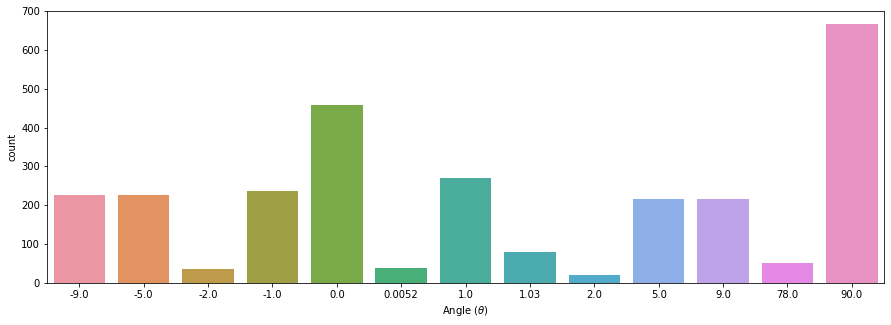

In [15]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'Ang', data = data)
plt.xlabel(r'Angle ($\theta$)')

Text(0.5, 0, 'Internal Diameter ($m$)')

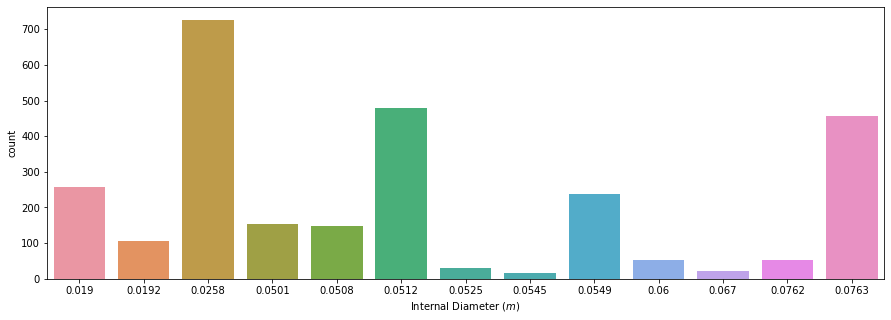

In [16]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'ID', data = data)
plt.xlabel(r'Internal Diameter ($m$)')

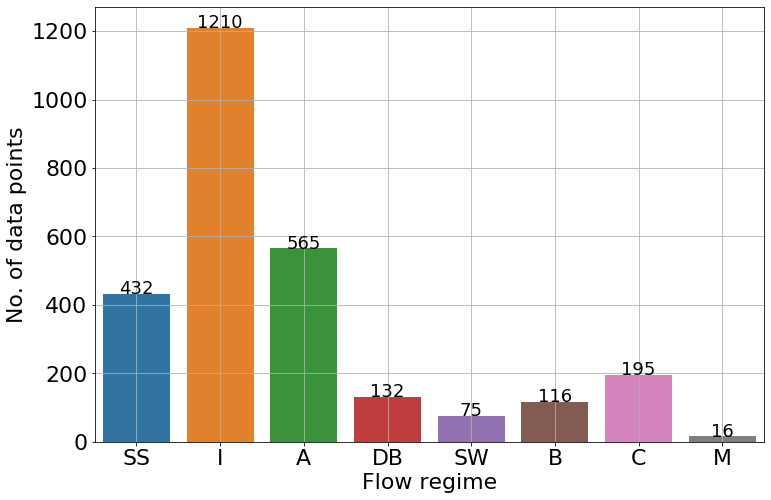

In [18]:
#data['Class_name']=data['Class_name'].replace(['SS', 'I', 'A', 'DB', 'SW', 'B', 'C', 'M'],['Stratified Smoth','Intermittent','Annular','Dispersed Bubble', 'Stratified Wavy','Bubble Flow','Churn','Mist'])
f=plt.figure(figsize = (12, 8))
ocean_plot = sns.countplot(x = 'Class_name', data = data)
for p in ocean_plot.patches:
    ocean_plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points',fontsize=18)
plt.grid()
#plt.title("Count of houses based on their proximity to ocean")
plt.xlabel("Flow regime",fontsize=22)
plt.ylabel("No. of data points",fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.show()

In [19]:
Y=data[['Class_id']].values
X=data[['Vsl','Vsg','ID','Roughness','Ang','Density_L','Density_G','Visc_L','Visc_G','ST','P','T']].values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)

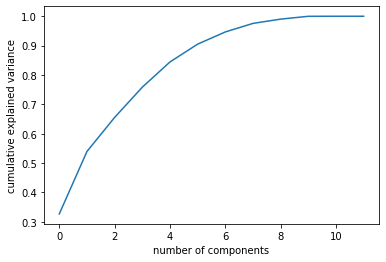

In [20]:
from sklearn.decomposition import PCA
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [21]:
T = pca.fit_transform(X)
print(X.shape)
print(T.shape)

(2741, 12)
(2741, 12)


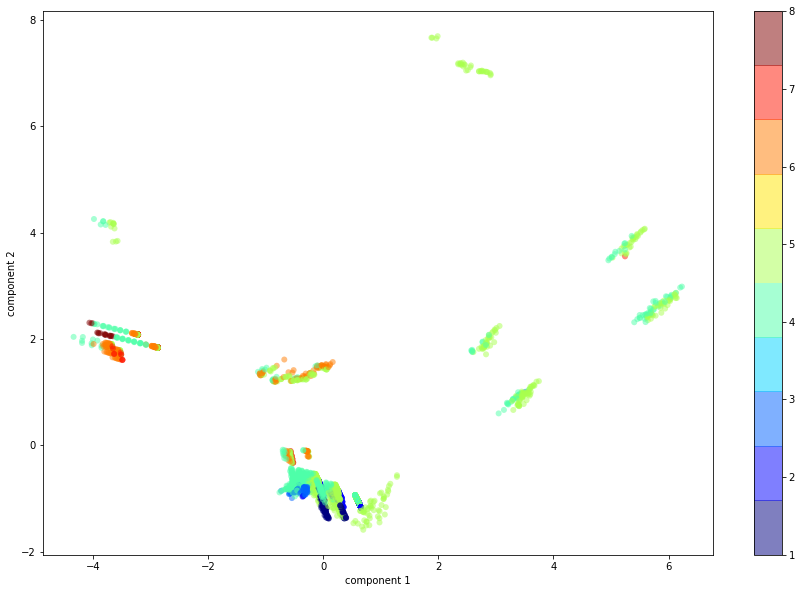

In [22]:
plt.figure(figsize=(15,10))
plt.scatter(T[:, 0], T[:, 1],
            c=Y.flatten(), edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('jet', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

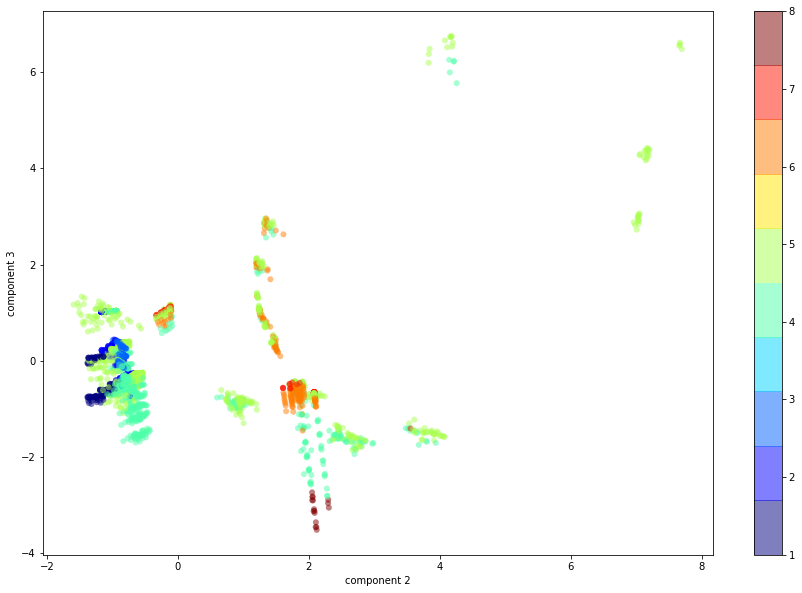

In [23]:
plt.figure(figsize=(15,10))
plt.scatter(T[:, 1], T[:, 2],
            c=Y.flatten(), edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('jet', 10))
plt.xlabel('component 2')
plt.ylabel('component 3')
plt.colorbar();

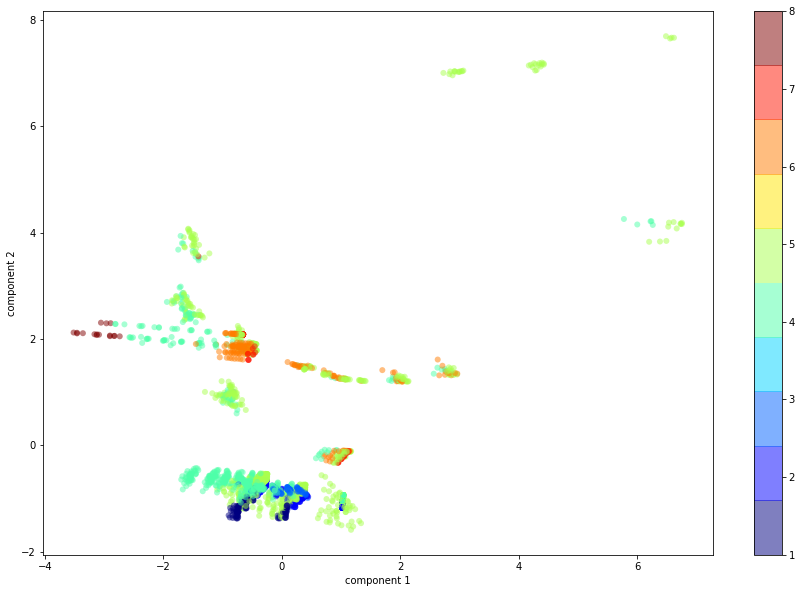

In [37]:
plt.figure(figsize=(15,10))
plt.scatter(T[:, 2], T[:, 1],
            c=Y.flatten(), edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('jet', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [26]:
P=pca.components_
T = X.dot(P.T)

In [27]:
print(P[0,:])

[ 2.55288131e-02 -1.33954992e-01  2.71067431e-01 -2.22044605e-16
 -2.23023938e-01 -4.27042265e-01  4.38785492e-01 -6.47495236e-02
  2.39018601e-02 -4.57734665e-01  4.22812557e-01  3.00389789e-01]


First component  [ 2.55288131e-02 -1.33954992e-01  2.71067431e-01 -2.22044605e-16
 -2.23023938e-01 -4.27042265e-01  4.38785492e-01 -6.47495236e-02
  2.39018601e-02 -4.57734665e-01  4.22812557e-01  3.00389789e-01]


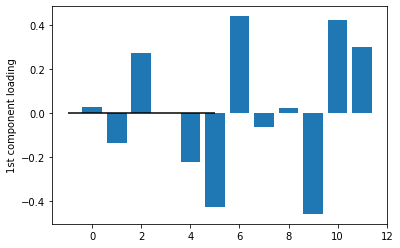

In [29]:
#Loading of the first component
print("First component ", P.T[:,0])
x = np.arange(12)
plt.bar(x, height= P.T[:,0])
plt.hlines(0,-1,5)
#plt.xticks(x+.1, ['GDP_per_capita','Social_support','Healthy_life_expectancy','Freedom_to_make_life_choices','Generosity','Perceptions_of_corruption'])
plt.ylabel("1st component loading")
plt.show()

# To Do

* Study the influence of normalization

* Improve the visualization (try putting the labels of the countries on the score plot)

* Explore other PCs

* Explain the contrbution of the different original features to the principal components

* Interpret the score plot in the light of th eloading plots

* Use first few principal components in combniation with any clustering algorithm to classify the flow patterns

Second component  [-0.12080843  0.03568773 -0.15547447  0.          0.50653541  0.26564977
  0.29576774  0.26512362  0.39461242  0.232979    0.34742802  0.37991839]


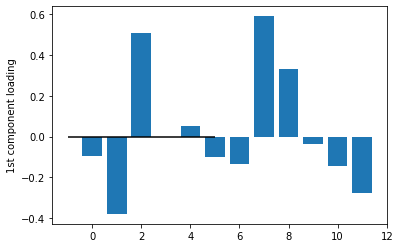

In [33]:
#Loading of the first component
print("Second component ", P.T[:,1])
x = np.arange(12)
plt.bar(x, height= P.T[:,2])
plt.hlines(0,-1,5)
#plt.xticks(x+.1, ['GDP_per_capita','Social_support','Healthy_life_expectancy','Freedom_to_make_life_choices','Generosity','Perceptions_of_corruption'])
plt.ylabel("1st component loading")
plt.show()

In [119]:

from sklearn.cluster import KMeans

Kmean = KMeans(n_clusters=10)
X_proj = T@P.T[:,:6]
Kmean = KMeans(n_clusters=10,verbose=1)
Kmean.fit(T[:,:6])
print(Kmean.cluster_centers_.shape)
Kmean.cluster_centers_


Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 3115.496031981389
start iteration
done sorting
end inner loop
Iteration 1, inertia 2929.571347526865
start iteration
done sorting
end inner loop
Iteration 2, inertia 2845.746579208451
start iteration
done sorting
end inner loop
Iteration 3, inertia 2806.037343615894
start iteration
done sorting
end inner loop
Iteration 4, inertia 2800.4802241915504
start iteration
done sorting
end inner loop
Iteration 5, inertia 2798.062139263628
start iteration
done sorting
end inner loop
Iteration 6, inertia 2797.685716659647
start iteration
done sorting
end inner loop
Iteration 7, inertia 2797.320948369032
start iteration
done sorting
end inner loop
Iteration 8, inertia 2796.27224968881
start iteration
done sorting
end inner loop
Iteration 9, inertia 2795.5750655043953
start iteration
done sorting
end inner loop
Iteration 10, inertia 2795.563303184524
center shift 1.028230e-05 within tolerance 1.659126e-04
Initi

array([[-3.73417072e+00,  2.08628780e+00, -2.45568192e+00,
        -1.58785409e+00,  2.41457816e+00,  6.81425430e-01],
       [ 1.37354025e-03, -7.80742085e-01, -5.95696170e-02,
         2.42947152e-01, -1.46639871e-02, -1.57552616e-01],
       [ 4.39308188e+00,  2.11528155e+00, -1.18043707e+00,
        -2.94515270e-01, -5.65952356e-01,  6.29582994e-01],
       [ 9.10394247e-02, -1.12193384e+00, -4.51974177e-01,
         2.68698474e+00,  2.00731241e-01,  2.61822702e-01],
       [ 2.52527388e+00,  7.16127183e+00,  4.02397148e+00,
         1.98273748e+00,  3.83915775e+00, -4.39157268e+00],
       [-3.25285054e+00,  1.90320442e+00, -6.79633950e-01,
         3.66811193e-02, -1.16587287e+00, -4.38782709e-01],
       [-4.96256953e-01,  1.33880687e+00,  1.42163495e+00,
        -1.34278381e-01, -3.18956735e-01,  1.38590046e+00],
       [-3.74107891e-01, -7.17110167e-01, -7.16224763e-01,
        -7.40868909e-01,  1.49884340e+00,  1.18635179e-01],
       [-3.71515057e+00,  4.10903678e+00,  6.427

In [121]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib auto
fig = plt.figure(2)
print(Y.shape)
print(X.shape)
print(X.shape)
plt.ion()
col_map = plt.cm.get_cmap('jet', 10)
i = 0
j = 2
plt.scatter(T[:,i],T[:,j],s=2,c=Y.flatten(), alpha=1,
            cmap=plt.cm.get_cmap('jet', 10))

centres= Kmean.cluster_centers_
print(centres.shape)
plt.scatter(centres[:,i],centres[:,j],c=np.arange(10),marker='s',s=50,edgecolor='none', alpha=1,
            cmap=plt.cm.get_cmap('jet', 10))
plt.colorbar()
plt.show(block = False)

Using matplotlib backend: MacOSX
(2741, 1)
(2741, 12)
(2741, 12)
(10, 6)


In [ ]:
print(np.sum(Kmean.labels_==Y.flatten))